# Import necessary packages

In [13]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import talib
import numpy as np

# Plot of closing price

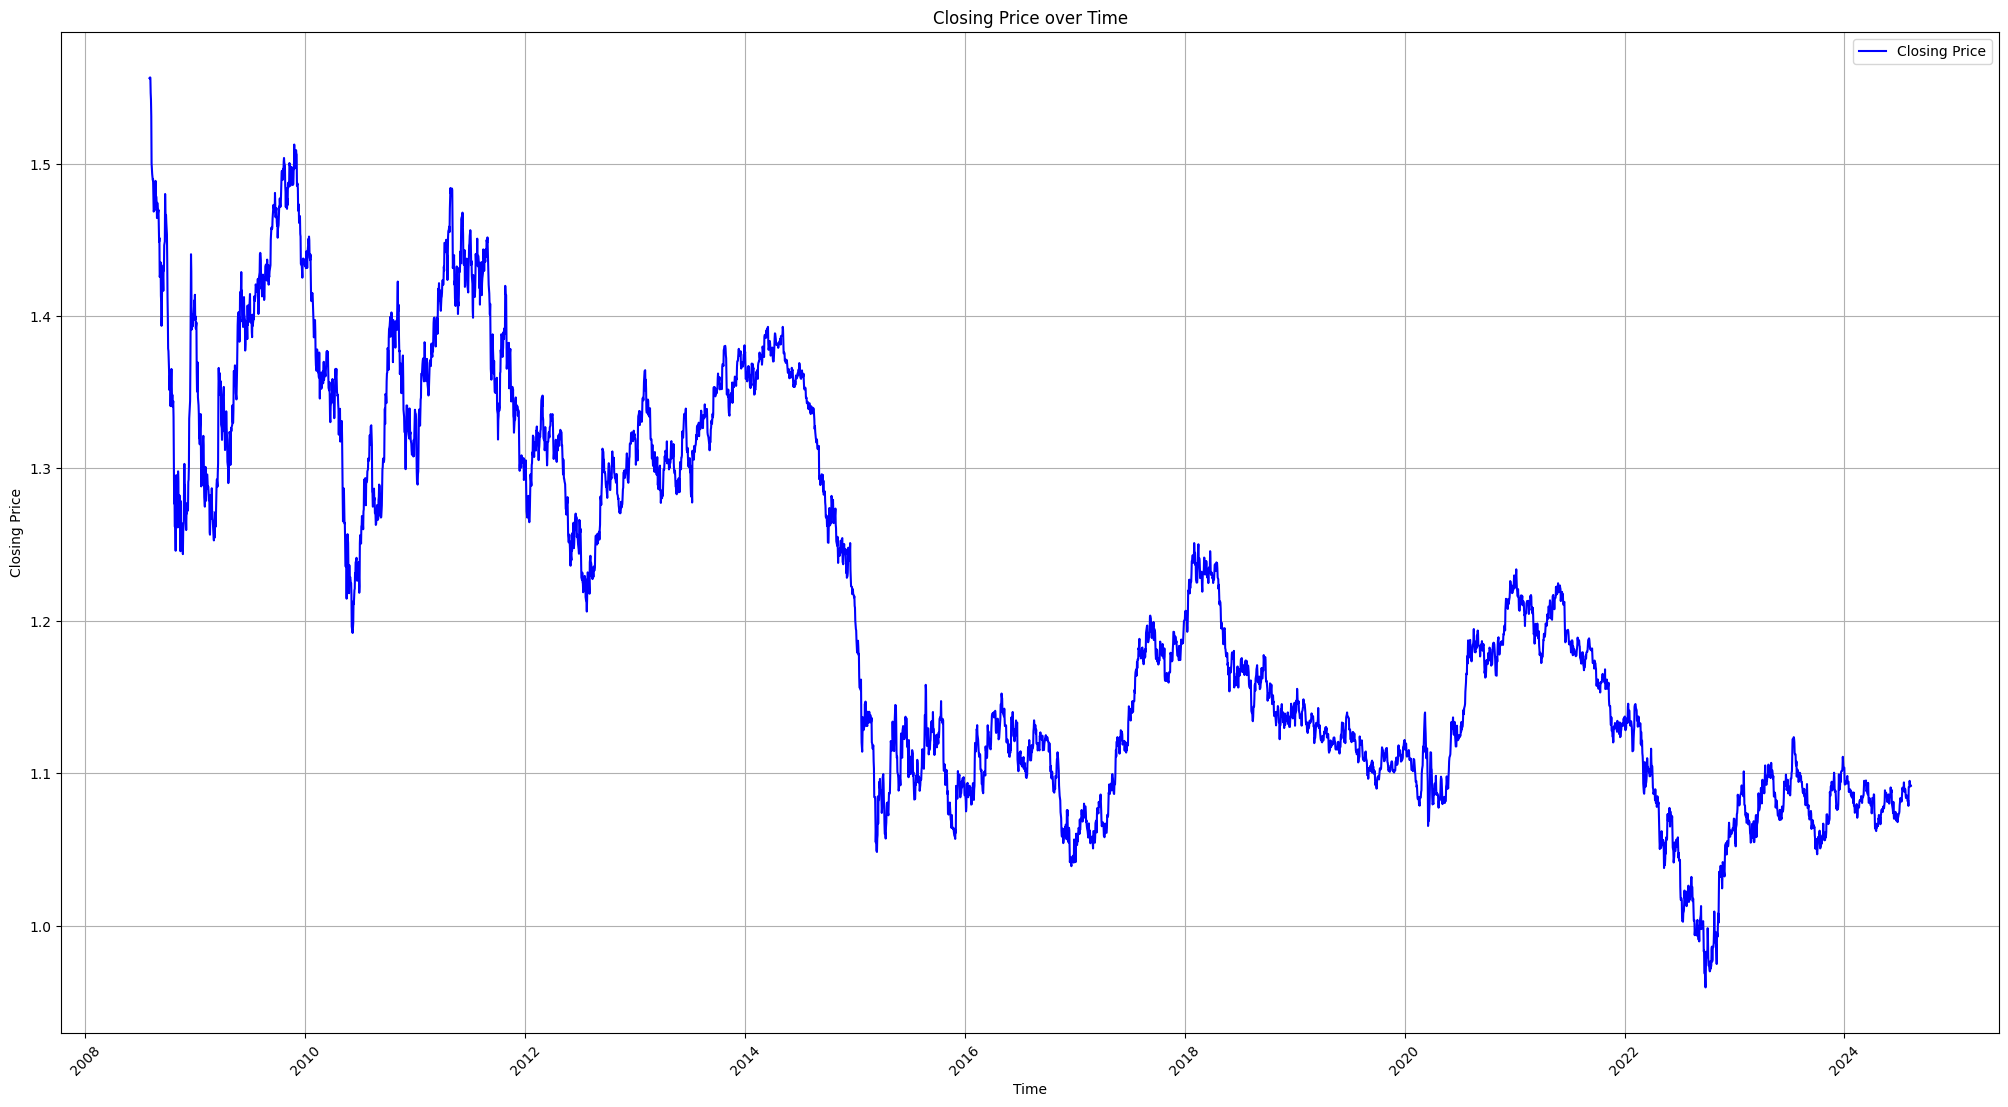

In [14]:
file_path = './Data/EURUSD_D1.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

data['Time'] = pd.to_datetime(data['Time'],format='%Y-%m-%d %H:%M:%S')
# data= data.set_index('Time', inplace=True)
statData = data # for statistical analysis

# Extract Time and Close columns
time_data = data['Time'].values  # Numpy array of time values
close_data = data['Close'].values  # Numpy array of closing prices

# Optionally, convert the closing prices to a PyTorch tensor
close_tensor = torch.tensor(close_data, dtype=torch.float32)

# Plot the closing price over time using matplotlib
plt.figure(figsize=(25, 13))
plt.plot(time_data, close_tensor, label="Closing Price", color='blue', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Closing Price over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.show()

# Stationarity test

In [15]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag_, nobs_, critical_values, icbest_ = adfuller(data.iloc[:, -2])
if pvalue >0.05:
    print(f'p-value = {pvalue}. \nClosing price data is NOT stationary')
else:
    print(f'p-value = {pvalue}. \nData is stationary')

#Weak stationarity?


p-value = 0.06046931425545568. 
Closing price data is NOT stationary


# Data Exploration? Boxplot, see year trend, seasonality per quarter, etc

               Open     High      Low    Close    Volume
Time                                                    
2024-07-21  1.08861  1.09027  1.08807  1.08988   13131.0
2024-07-22  1.08988  1.08998  1.08730  1.08889  192600.0
2024-07-23  1.08888  1.08967  1.08438  1.08496  189398.0
2024-07-24  1.08495  1.08664  1.08256  1.08378  228205.0
2024-07-25  1.08379  1.08699  1.08282  1.08513  274997.0
2024-07-26  1.08514  1.08681  1.08420  1.08547  162991.0
2024-07-27      NaN      NaN      NaN      NaN       NaN
2024-07-28  1.08553  1.08599  1.08527  1.08527    8309.0
2024-07-29  1.08524  1.08700  1.08028  1.08190  164236.0
2024-07-30  1.08191  1.08356  1.07982  1.08157  197098.0
2024-07-31  1.08156  1.08493  1.08019  1.08238  310176.0
2024-08-01  1.08235  1.08354  1.07774  1.07864  315513.0
2024-08-02  1.07864  1.09265  1.07818  1.09098  359862.0
2024-08-03      NaN      NaN      NaN      NaN       NaN
2024-08-04  1.09225  1.09234  1.09028  1.09103   18972.0
2024-08-05  1.09104  1.10088  1

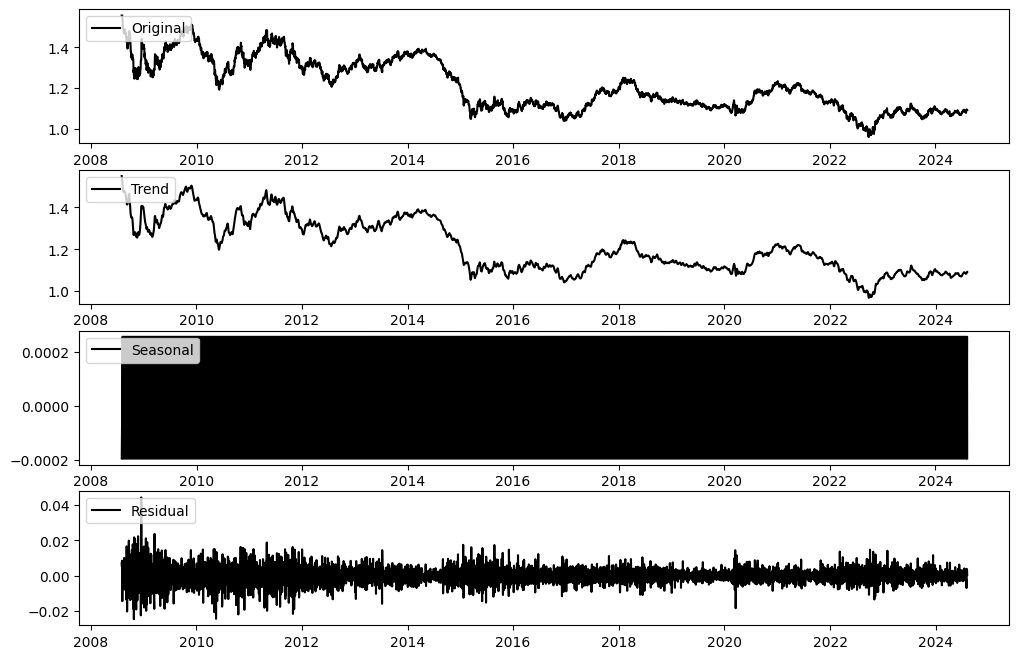

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
file_path = './Data/EURUSD_D1.csv'  # Replace with your actual file path
statData = pd.read_csv(file_path)

# Convert 'Time' column to datetime and set it as the index
statData['Time'] = pd.to_datetime(statData['Time'], format='%Y-%m-%d %H:%M:%S')
statData.set_index('Time', inplace=True)

# Set frequency to daily
statData = statData.asfreq('D') #change frequency , weekly and Monthly

print(statData.tail(20))

statData['Close'].fillna(method='ffill', inplace=True)  # Forward fill missing data

# Decompose the time series
decomposed = seasonal_decompose(statData['Close'], model='additive')

# Extract trend, seasonal, and residual components
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(statData['Close'], label='Original', color='black')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='black')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='black')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residual', color='black')
plt.legend(loc='upper left')

plt.show()


# FNN Model - usee only Closing as feature and its LAG

[(tensor([1.5561, 1.5566, 1.5564, 1.5464, 1.5419]), tensor(1.5311)), (tensor([1.5566, 1.5564, 1.5464, 1.5419, 1.5311]), tensor(1.5003)), (tensor([1.5564, 1.5464, 1.5419, 1.5311, 1.5003]), tensor(1.4932)), (tensor([1.5464, 1.5419, 1.5311, 1.5003, 1.4932]), tensor(1.4912)), (tensor([1.5419, 1.5311, 1.5003, 1.4932, 1.4912]), tensor(1.4891)), (tensor([1.5311, 1.5003, 1.4932, 1.4912, 1.4891]), tensor(1.4896)), (tensor([1.5003, 1.4932, 1.4912, 1.4891, 1.4896]), tensor(1.4773)), (tensor([1.4932, 1.4912, 1.4891, 1.4896, 1.4773]), tensor(1.4686)), (tensor([1.4912, 1.4891, 1.4896, 1.4773, 1.4686]), tensor(1.4699)), (tensor([1.4891, 1.4896, 1.4773, 1.4686, 1.4699]), tensor(1.4694)), (tensor([1.4896, 1.4773, 1.4686, 1.4699, 1.4694]), tensor(1.4791)), (tensor([1.4773, 1.4686, 1.4699, 1.4694, 1.4791]), tensor(1.4750)), (tensor([1.4686, 1.4699, 1.4694, 1.4791, 1.4750]), tensor(1.4887)), (tensor([1.4699, 1.4694, 1.4791, 1.4750, 1.4887]), tensor(1.4791)), (tensor([1.4694, 1.4791, 1.4750, 1.4887, 1.4791

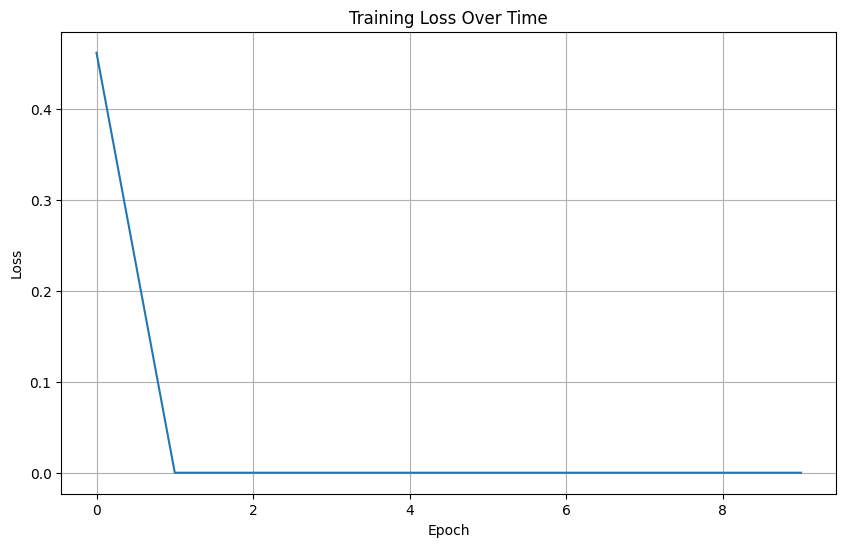

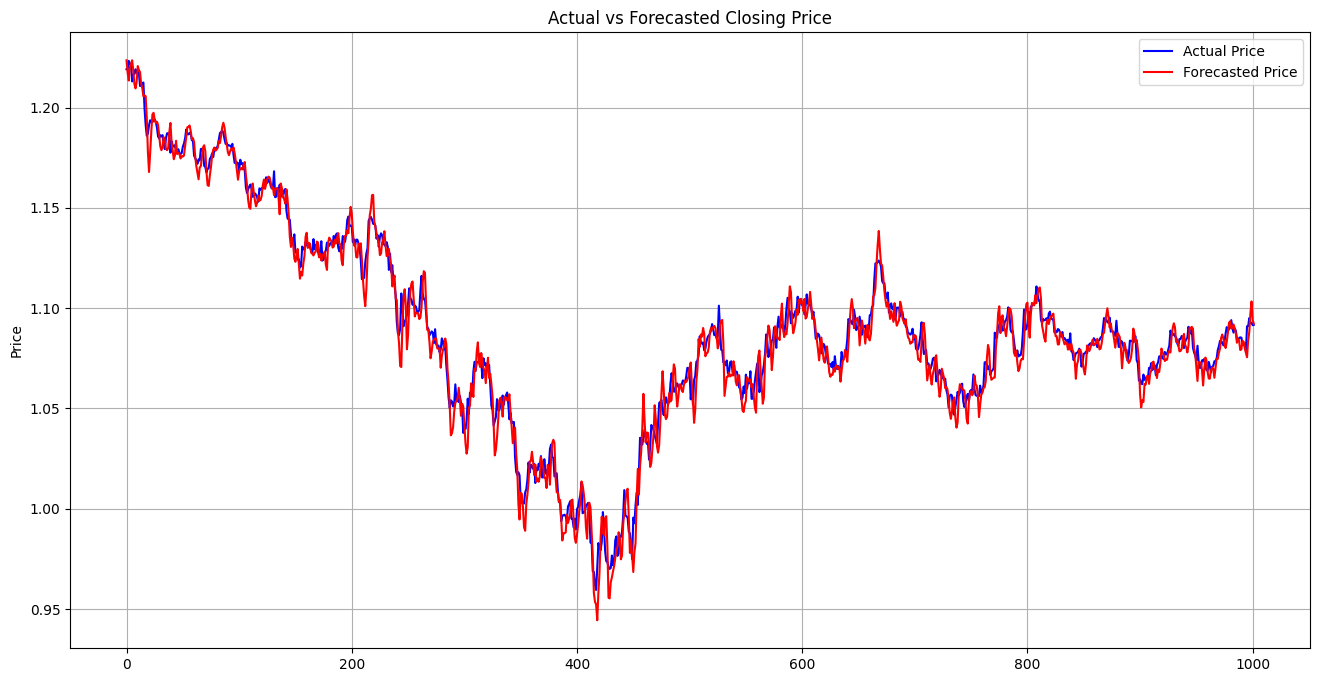

In [17]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Data Loader
class ForexDataset(Dataset):
    def __init__(self, file_path, n_past=5):
        self.data = pd.read_csv(file_path)  # Load the dataset

        self.features = []
        self.labels = []

        # Create sequences of n_past timesteps for features and the next closing price for labels
        for i in range(n_past, len(self.data)):
            self.features.append(self.data.iloc[i-n_past:i, -2].values)  # Use the previous n_past rows of the closing price
            self.labels.append(self.data.iloc[i, -2])  # The target is the closing price at the current timestep

    def __len__(self):
        return len(self.features)  # Return the number of samples
    
    def __getitem__(self, idx):
        # Convert features and labels to tensors
        feature = torch.tensor(self.features[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        return feature, label

# Load the dataset
file_path = './Data/EURUSD_D1.csv'  # Replace with your actual file path

input_size = 5  # Number of input features (n_past)

dataset = ForexDataset(file_path, input_size)

# Split the dataset into training and test sets (without shuffling)
train_size = int(0.8 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size
# train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_dataset, test_dataset = train_test_split(dataset,  test_size=0.2, random_state=42, shuffle=False)

print(train_dataset)

# train_dataset, test_dataset = torch.tensor(dataset[:train_size, :]), torch.tensor(dataset[train_size:, :])
print(train_dataset)
# DataLoader for batch processing (no shuffling for time series data)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

show_batch_info = 0
if show_batch_info ==1:
    for batch_idx , (features,label) in enumerate(train_loader):
        print(f'batch id {batch_idx}')
        print(f'features: {features}')
        print(f'label: {label}')

# Define the Neural Network
hidden_size_1 = 10  # Hidden layer 1 size (# nuerons)
hidden_size_2 = 10  # Hiden layer 2 size (# neurons)
hidden_size_3 = 5   # hidden layer 3
hidden_size_4 = 5
output_size = 1  # Output layer size (predicting the closing price)

torch.manual_seed(42)  # For reproducibility

# Initialize weights and biases for the hidden and output layers
W_hidden_1 = torch.randn(input_size, hidden_size_1, requires_grad=True)  
b_hidden_1 = torch.randn(hidden_size_1, requires_grad=True) 

W_hidden_2 = torch.randn(hidden_size_1, hidden_size_2, requires_grad=True)  
b_hidden_2 = torch.randn(hidden_size_2, requires_grad=True) 

W_output = torch.randn(hidden_size_2, output_size, requires_grad=True) 
b_output = torch.randn(output_size, requires_grad=True)  

# Activation function (ReLU)
def relu(x):
    return torch.max(torch.tensor(0.0), x)

# Loss function (Mean Squared Error)
def loss_function(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Forward propagation function
def forward(features):
    hidden_layer_1 = features @ W_hidden_1 + b_hidden_1  # Linear transformation (input -> hidden)
    activated_hidden_1 = relu(hidden_layer_1)  # Apply ReLU activation

    hidden_layer_2  = activated_hidden_1 @ W_hidden_2 + b_hidden_2
    activated_hidden_2 = relu(hidden_layer_2)

    output = activated_hidden_2 @ W_output + b_output  # Linear transformation (hidden -> output)
    return output

# Training the neural network
learning_rate = 0.001
num_epochs = 10

# Track loss during training
train_loss_history = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch_idx, (features, labels) in enumerate(train_loader):
        # Forward pass
        predicted_close = forward(features)
        
        # Compute the loss
        loss = loss_function(predicted_close, labels.view(-1, 1))  # Reshape labels for compatibility
      
        # Backward pass (compute gradients)
        loss.backward()
        
        # Update weights using gradient descent
        with torch.no_grad():
            W_hidden_1 -= learning_rate * W_hidden_1.grad
            b_hidden_1 -= learning_rate * b_hidden_1.grad

            W_hidden_2 -= learning_rate * W_hidden_2.grad
            b_hidden_2 -= learning_rate * b_hidden_2.grad

           
            W_output -= learning_rate * W_output.grad
            b_output -= learning_rate * b_output.grad

            # Zero the gradients after updating
            W_hidden_1.grad.zero_()
            b_hidden_1.grad.zero_()

            W_hidden_2.grad.zero_()
            b_hidden_2.grad.zero_()

            W_output.grad.zero_()
            b_output.grad.zero_()
        
        epoch_loss += loss.item() # Loss for each batch
    
    avg_loss = epoch_loss / len(train_loader)   # Average loss for the epoch based on number batches
    train_loss_history.append(avg_loss) # store avg loss for each epoch
    print_batch_info = 0 

    if print_batch_info == 1:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}')

# Plot training loss history
plt.figure(figsize=(10, 6))
plt.plot(train_loss_history, label="Training Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()

# Evaluate the model on the test set
actual_prices = []
predicted_prices = []

with torch.no_grad():  # Disable gradient computation during testing
    for batch_idx, (features, labels) in enumerate(test_loader):
        predicted_close = forward(features)
        actual_prices.extend(labels.tolist())  # Collect actual prices
        predicted_prices.extend(predicted_close.view(-1).tolist())  # Collect predicted prices

# Plot actual vs predicted prices
plt.figure(figsize=(16, 8))
plt.plot(actual_prices, label="Actual Price", color='blue', linestyle='-')
plt.plot(predicted_prices, label="Forecasted Price", color='red', linestyle='-')
plt.ylabel('Price')
plt.title('Actual vs Forecasted Closing Price')
plt.legend()
plt.grid(True)
plt.show()


# FNN - multivariate forcasting

In [19]:
###################### Data Loading and additional feature engineering ###########################

def multivariateFeatureEngineering(filepath):
    data = pd.read_csv(filepath)

    data['Time'] = pd.to_datetime(data['Time'],format='%Y-%m-%d %H:%M:%S')
    
    '''
        Feature Egineering - Added features: MA, EMA, MACD, RSI
    '''
    #Trend following Indicators:

    #SMA - identofy long term trend
    data['50_sma'] = data['Close'].rolling(window=50).mean() 
    data['200_sma'] = data['Close'].rolling(window=200).mean() 

    #EMA - trend analysis: more weight applied to recent points
    data['50_ema'] = data['Close'].ewm(span=50, adjust=False).mean()
    data['100_ema'] = data['Close'].ewm(span=100, adjust=False).mean()

    #MACD
    data['12_ema'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['26_ema'] = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD_line'] = data['12_ema']-data['26_ema'] # calculate the MACD line
    data['Signal_line'] = data['MACD_line'].ewm(span=9, adjust=False).mean() # 9-preiod ema signal calculated from the Macdline
    data['MACD_histogram'] = data['MACD_line'] - data['Signal_line']

    #ADX
    # Calculate ADX using TA-Lib (14-period by default)
    data['ADX'] = talib.ADX(data['High'], data['Low'], data['Close'], timeperiod=14)

    #Momentum indicators:

    #RSI - 14-period
    data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
    
    #Stochastic Oscillator
    data['stoch_k'], data['stoch_d'] = talib.STOCH(data['High'], data['Low'], data['Close'], 
                                                fastk_period=14, slowk_period=3, slowd_period=3)

    #Williams %R - Default period is 14
    data['Williams_R'] = talib.WILLR(data['High'], data['Low'], data['Close'], timeperiod=14)

    #Volatility indicators#:

    #Bollinger Bands - Default period is 20 for moving average and standard deviation (can be adjusted)
    data['upper_band'], data['middle_band'], data['lower_band'] = talib.BBANDS(data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

    #ATR -Default period for ATR is 14
    data['ATR'] = talib.ATR(data['High'], data['Low'], data['Close'], timeperiod=14)

    data = data.dropna() # drop rows that have NA

    return data

# calculate the additional features
file_path = './Data/EURUSD_D1.csv'  
multifeatureData = multivariateFeatureEngineering(file_path) # Load dataset
multifeatureData = multifeatureData.drop(columns=['Time']).reset_index(drop=True) #drop time columns
cols = [col for col in multifeatureData.columns if col!='Close'] +['Close'] #shift Close to end
multifeatureData =multifeatureData[cols]



################################## Calculte the lagged features - Data Loader #####################################
n_past= 3
n_future =1
target_column =-1
selected_features = ['Open', 'High', 'Close']
data = multifeatureData[selected_features] #subset selection of features and model performance ->convert to numpy array if error
print(data.head())


class mf_ForexDataset(Dataset):
    def __init__(self, data, n_past, n_future, target_column=1):
        # Create the lagged features and corresponding responses
        self.features, self.response = self.create_lagged_features(data, n_past, n_future, target_column)

    def create_lagged_features(self, data, n_past, n_future, target_column):
  `  features = []
    response = []

    num_features = data.shape[1]  # Number of features in the dataset
    
    for i in range(n_past, len(data) - n_future + 1):
        lagged_features = []
        
        # Extract lags for each feature and group them accordingly
        for feature_idx in range(num_features):
            # Get the lags for a specific feature
            feature_lags = data.iloc[i - n_past:i, feature_idx].values  # Past n_past values for the feature
            lagged_features.extend(feature_lags)  # Append the lags to the feature list
        
        features.append(lagged_features)  # Append the lagged features for the current row

        # Extract the target (Close price in this case)
        response.append(data.iloc[i + n_future - 1, target_column])  # Target column

    # Convert to NumPy arrays
    features = np.array(features)
    response = np.array(response)

    # Convert to PyTorch tensors
    features_tensor = torch.tensor(features, dtype=torch.float32)
    response_tensor = torch.tensor(response, dtype=torch.float32).unsqueeze(1)  # Add extra dimension to target

    return features_tensor, response_tensor

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.response[idx]


dataset = mf_ForexDataset(data, n_past, n_future, target_column)
mf_dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

# Example: Iterate over the dataloader - verify shape
for batch_idx, (features, labels) in enumerate(mf_dataloader):
    print(f"Batch {batch_idx + 1}")
    print(f"Features: {features}")  # (batch_size, n_past * num_features)
    print(f"Labels: {labels}")      # (batch_size, 1)
    # Use the features and labels for model training
    break  # Break after the first batch for demonstration

# scale data

# Train fNN model


# Test FNN model

# Plot results

      Open     High    Close
0  1.36200  1.36740  1.36265
1  1.36265  1.37360  1.36175
2  1.36175  1.36780  1.34810
3  1.34810  1.36465  1.35740
4  1.35740  1.36385  1.35270
Batch 1
Features: tensor([[1.3620, 1.3674, 1.3627, 1.3627, 1.3736, 1.3618, 1.3618, 1.3678, 1.3481],
        [1.3627, 1.3736, 1.3618, 1.3618, 1.3678, 1.3481, 1.3481, 1.3647, 1.3574],
        [1.3618, 1.3678, 1.3481, 1.3481, 1.3647, 1.3574, 1.3574, 1.3638, 1.3527],
        [1.3481, 1.3647, 1.3574, 1.3574, 1.3638, 1.3527, 1.3528, 1.3591, 1.3287],
        [1.3574, 1.3638, 1.3527, 1.3528, 1.3591, 1.3287, 1.3228, 1.3284, 1.3266],
        [1.3528, 1.3591, 1.3287, 1.3228, 1.3284, 1.3266, 1.3267, 1.3280, 1.3188],
        [1.3228, 1.3284, 1.3266, 1.3267, 1.3280, 1.3188, 1.3188, 1.3342, 1.3256],
        [1.3267, 1.3280, 1.3188, 1.3188, 1.3342, 1.3256, 1.3256, 1.3286, 1.3243],
        [1.3188, 1.3342, 1.3256, 1.3256, 1.3286, 1.3243, 1.3240, 1.3517, 1.3472],
        [1.3256, 1.3286, 1.3243, 1.3240, 1.3517, 1.3472, 1.3472, 1.349